In [1]:
from parameter_optimizer import optimize_parameters, plot_parameter_sensitivity
from strategies.opening_range_breakout_strategy.variant_2 import opening_range_breakout_strategy
from tester import StrategyTester

In [2]:
tester_config = {
    'symbols': ['SPY'],
    'start_date': (2018, 1, 1),
    'end_date': (2018, 12, 31),
    'initial_cash': 10000,
    'resolution': 'minute'
}

param_grid = {
    'opening_range_minutes': [30],
    'breakout_buffer': [1, 1.5, 2],
    'reversion_multiple': [0.01],
    'max_positions': [1],
    'exit_time': ['15:45']
}


In [3]:

results = optimize_parameters(
    tester_config,
    opening_range_breakout_strategy,
    param_grid,
    metric='sharpe_ratio'
)


▶ Coordinate Descent Optimization
   Optimizing for: sharpe_ratio
   Parameters: opening_range_minutes, breakout_buffer, reversion_multiple, max_positions, exit_time
   Initial defaults: {'opening_range_minutes': 30, 'breakout_buffer': 1.5, 'reversion_multiple': 0.01, 'max_positions': 1, 'exit_time': '15:45'}

--- Pass 1 ---
  Optimizing opening_range_minutes... 
 
▶ Running backtest...
✓ Backtest complete

best = 30 (sharpe_ratio = 1.1090)

  Optimizing breakout_buffer... 
 
▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

best = 1.0 (sharpe_ratio = 2.6866)

  Optimizing reversion_multiple... 
 
best = 0.01 (sharpe_ratio = 2.6866)

  Optimizing max_positions... 
 
best = 1 (sharpe_ratio = 2.6866)

  Optimizing exit_time... 
 
best = 15:45 (sharpe_ratio = 2.6866)

   Updated: {'opening_range_minutes': 30, 'breakout_buffer': 1.0, 'reversion_multiple': 0.01, 'max_positions': 1, 'exit_time': '15:45'}

--- Pass 2 ---
  Optimizing opening_range_minutes.

In [4]:
# View top 10 results
print("\nTop 10 Parameter Combinations:")
results[['opening_range_minutes', 'breakout_buffer', 'reversion_multiple', 
               'max_positions', 'exit_time',
               'sharpe_ratio', 'total_return', 'max_drawdown', 'win_rate']].head(10)



Top 10 Parameter Combinations:


,opening_range_minutes,breakout_buffer,reversion_multiple,max_positions,exit_time,sharpe_ratio,total_return,max_drawdown,win_rate
1,30,1.0,0.01,1,15:45,2.686633,0.161272,-0.037807,0.549383
2,30,2.0,0.01,1,15:45,1.447603,0.042195,-0.046529,0.517647
0,30,1.5,0.01,1,15:45,1.109036,0.047204,-0.050376,0.500000


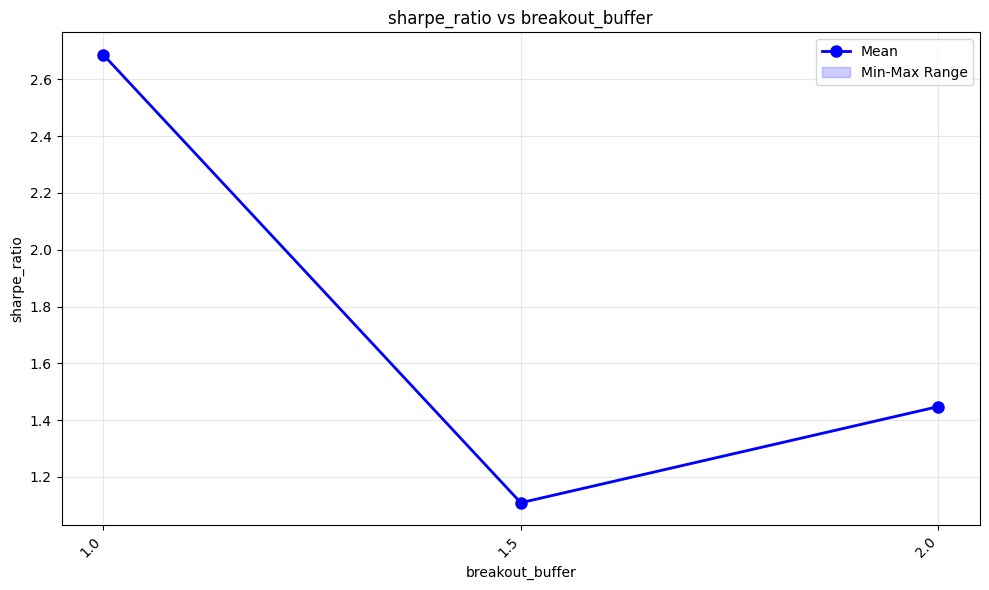

In [5]:
plot_parameter_sensitivity(results, 'breakout_buffer', 'sharpe_ratio')

### Observations / Conclusions

Parameter breakout_buffer is very sensible, lets try to understand why




▶ Running backtest...
✓ Backtest complete


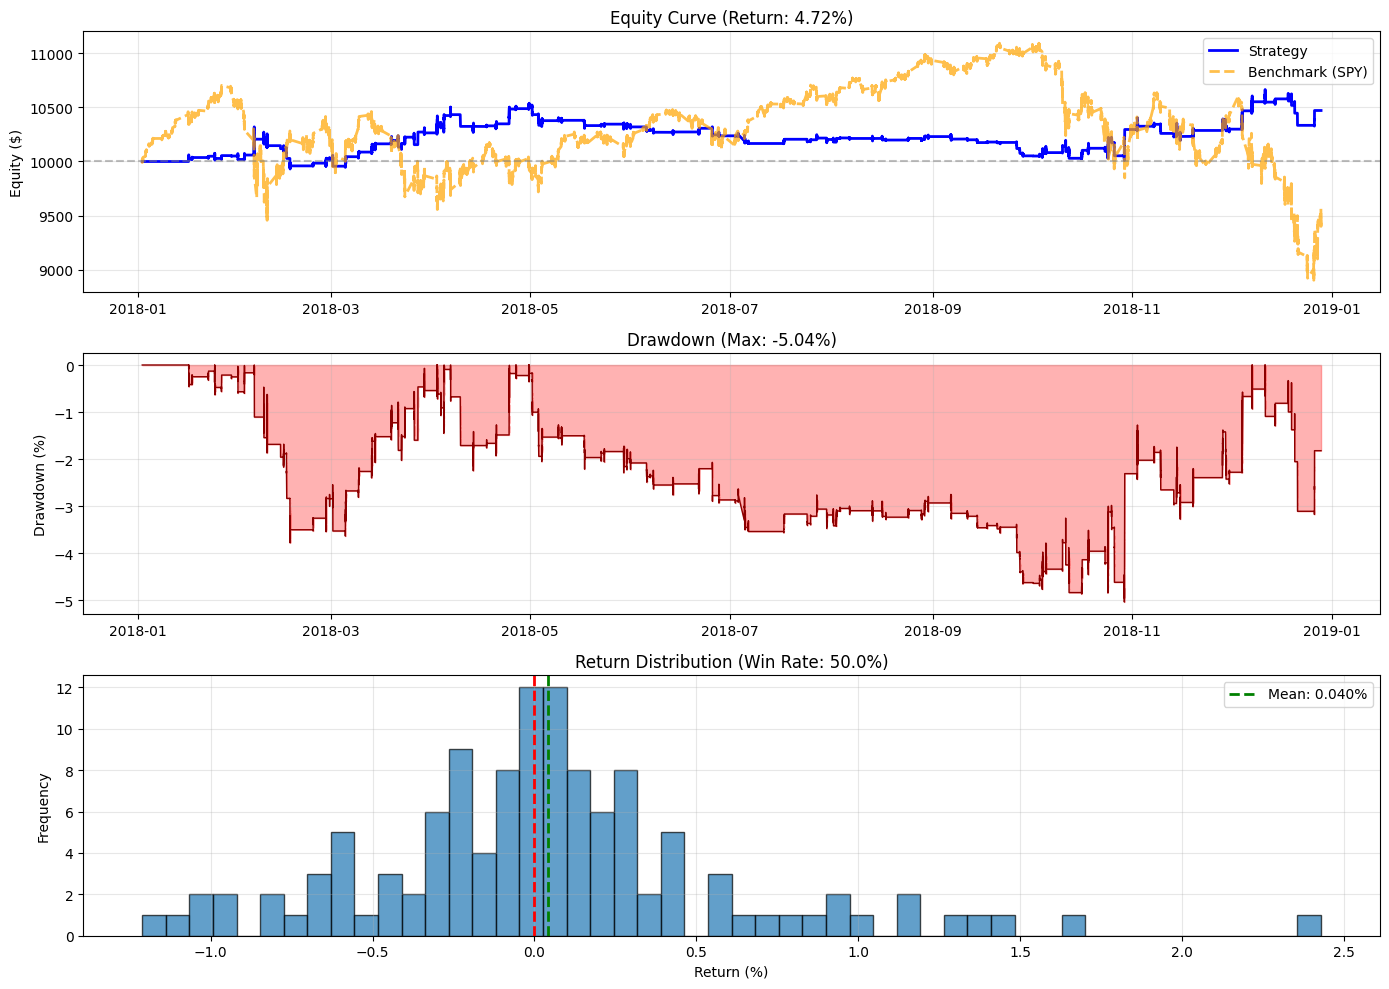


STRATEGY PERFORMANCE
Total Return:         4.72%
Sharpe Ratio:         1.11
Max Drawdown:        -5.04%
Calmar Ratio:         0.94

Total Trades:          120
Win Rate:             50.0%
Profit Factor:        1.22

Average Return:      0.040%
Average Win:         0.441%
Average Loss:       -0.367%
Best Trade:           2.43%
Worst Trade:         -1.21%



In [6]:



tester = StrategyTester(
    **tester_config,
    benchmark_symbol='SPY'
)

params = {
    'opening_range_minutes': 30,
    'breakout_buffer': 1.5,
    'reversion_multiple': 0.01,
    'exit_time': '15:45',
    'max_positions': 1
}

tester.run(opening_range_breakout_strategy, params)
stats = tester.get_stats(plot=True)
tester.print_stats(stats)


▶ Running backtest...
✓ Backtest complete


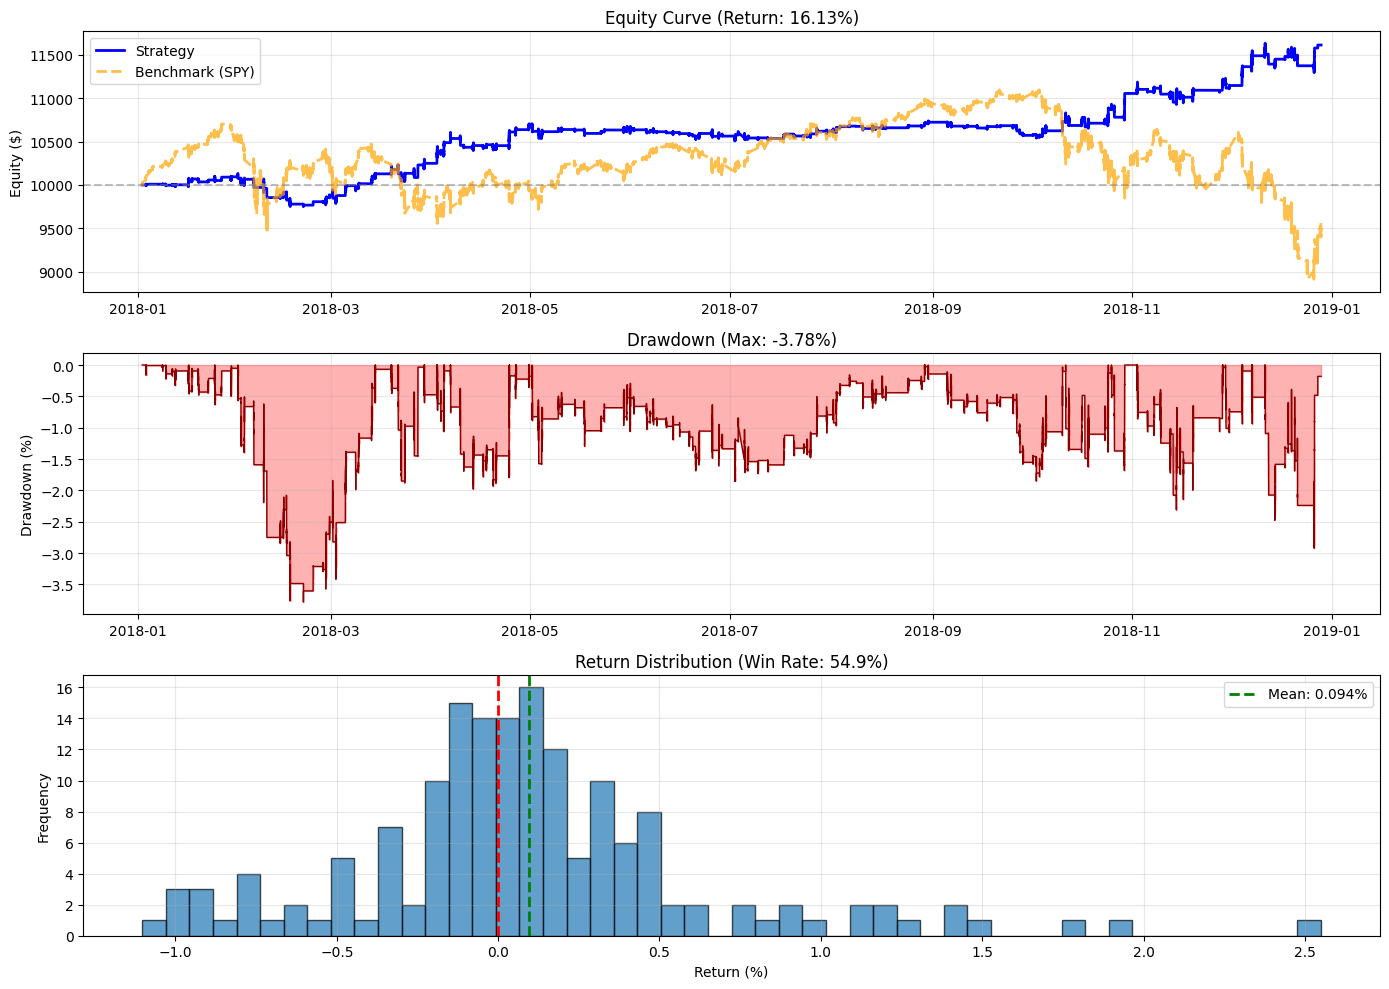


STRATEGY PERFORMANCE
Total Return:        16.13%
Sharpe Ratio:         2.69
Max Drawdown:        -3.78%
Calmar Ratio:         4.27

Total Trades:          162
Win Rate:             54.9%
Profit Factor:        1.66

Average Return:      0.094%
Average Win:         0.433%
Average Loss:       -0.332%
Best Trade:           2.55%
Worst Trade:         -1.10%



In [7]:

tester = StrategyTester(
    **tester_config,
    benchmark_symbol='SPY'
)

params = {
    'opening_range_minutes': 30,
    'breakout_buffer': 1,
    'reversion_multiple': 0.01,
    'exit_time': '15:45',
    'max_positions': 1
}

tester.run(opening_range_breakout_strategy, params)
stats = tester.get_stats(plot=True)
tester.print_stats(stats)

### Observations


- We are robust to market change

- When we increase breakout_buffer:
    - Less trade occurs (110 vs 160) and win rate is lower too, maybe because we waited too much to follow the trend so:
        - We capture less of the trend
        - There is a higher probability to mean revert
        - We can think of it as we are somehow too late

- Compared to the others params, this extreme sensitivity is a red flag for out-of-sample generalization

- We will now fix breakout_buffer to 1


### Next steps

- We'd like to add a set of highly liquid stocks to:
    - Reduce/Spread the risk
    - Invest every day possible

- max_positions will be set to total_assets / 2 because we have emprically observed that spy with 160 / 250 is already significantly choosen more than half. So this give us some margin to be sure to trade every day all our cash.


NB: We only select a few stocks of the most liquid stocks. In the performances improve we will try open our bets to a larger set of stocks.



▶ Running backtest...
✓ Backtest complete


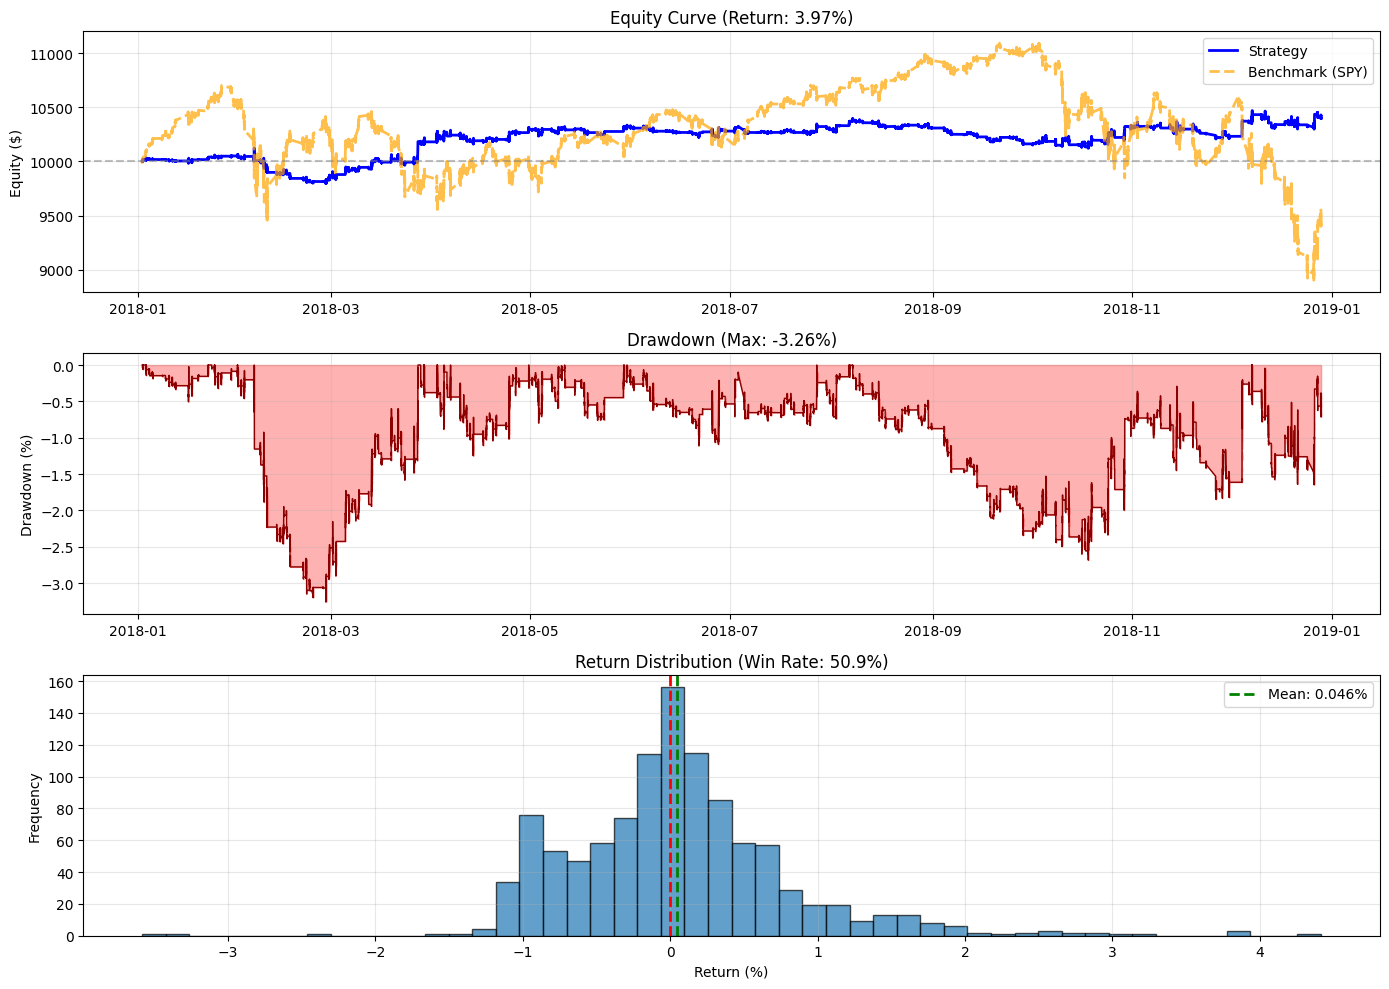


STRATEGY PERFORMANCE
Total Return:         3.97%
Sharpe Ratio:         0.97
Max Drawdown:        -3.26%
Calmar Ratio:         1.22

Total Trades:         1070
Win Rate:             50.9%
Profit Factor:        1.12

Average Return:      0.046%
Average Win:         0.573%
Average Loss:       -0.505%
Best Trade:           4.42%
Worst Trade:         -3.58%



In [8]:
symbols = ['SPY', 'QQQ', 'IWM', 'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'JPM', 'XOM']

tester_config = {
    'symbols': symbols,
    'start_date': (2018, 1, 1),
    'end_date': (2018, 12, 31),
    'initial_cash': 10000,
    'resolution': 'minute',
    'benchmark_symbol': 'SPY'
}


params = {
    'opening_range_minutes': 30,
    'breakout_buffer': 1,
    'reversion_multiple': 0.01,
    'exit_time': '15:45',
    'max_positions': len(symbols)//2
}

tester = StrategyTester(
    **tester_config,
)

tester.run(opening_range_breakout_strategy, params)
stats = tester.get_stats(plot=True)
tester.print_stats(stats)


### Observations - Next Steps

2 bigs redflags:

- Adding more stocks doesn't generalize well whereas the performances should be agnostic to the stock

- Our performances are mainly flats and only comes from big jumps (so a small amount of data)

- we optimized on SPY and likely overfitted on it, so it doesn’t generalize well to others stock